<a href="https://colab.research.google.com/github/IshanKapadia-Data/Instacart-Market-Basket-Analysis/blob/main/Market_Basket_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np

aisles       = pd.read_csv('aisles.csv')
departments  = pd.read_csv('departments.csv')
products     = pd.read_csv('products.csv')
orders       = pd.read_csv('orders.csv')
prior        = pd.read_csv('order_products__prior.csv')
train        = pd.read_csv('order_products__train.csv')

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
order_products = pd.concat([prior, train], ignore_index=True)
order_products.shape


(33819106, 4)

In [ ]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33819106, 15)

In [ ]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [ ]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [ ]:
def reduce_memory(df):


    start_mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")

    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:

            cmin = df[col].min()
            cmax = df[col].max()

            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)

            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)

            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)

        if df[col].dtypes in ["float64", "float32"]:

            cmin = df[col].min()
            cmax = df[col].max()

            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)

            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)

    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")

    return df

In [ ]:
order_products = reduce_memory(order_products)

Memory usage of properties dataframe is : 3870.2896614074707  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1773.8828296661377  MB
This is  45.83333509515789 % of the initial size


In [ ]:
order_products.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [ ]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

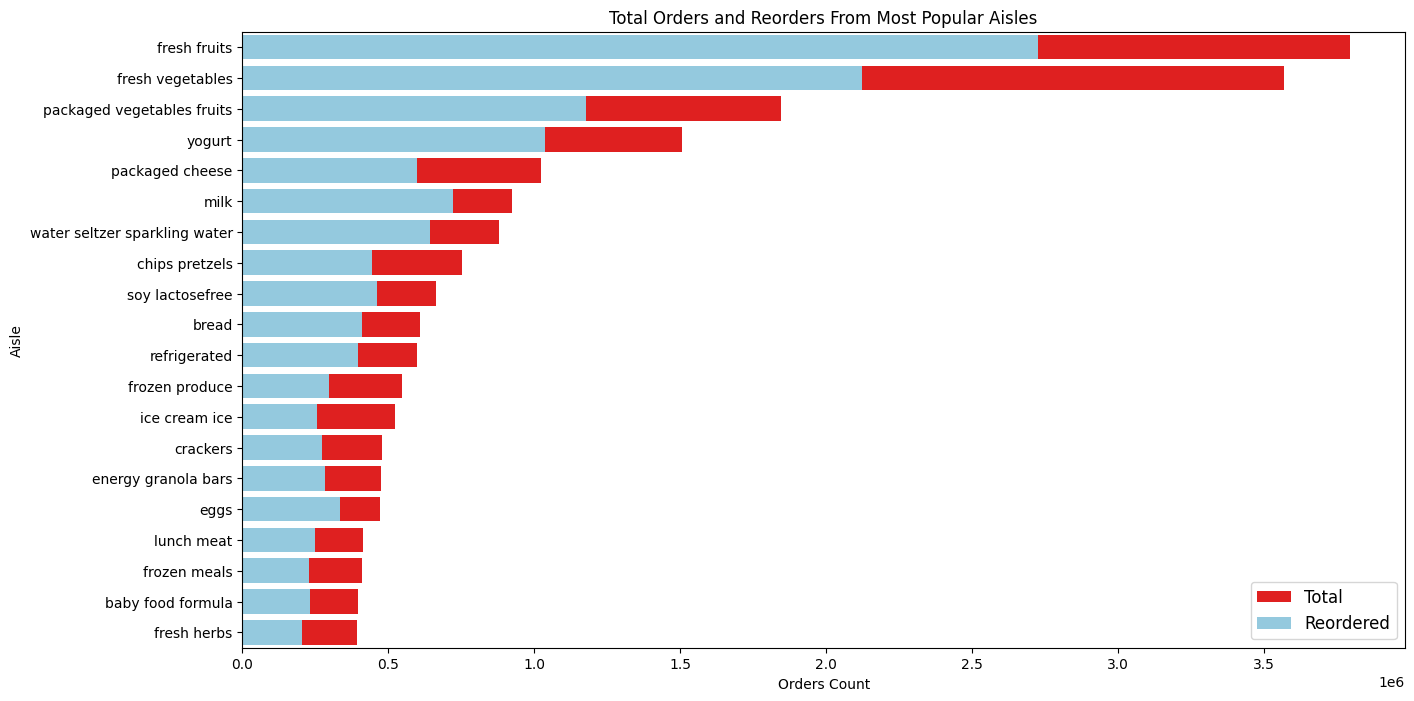

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

# Plot total orders
sns.barplot(
    y=temp_df.aisle[0:20],
    x=temp_df.total[0:20],
    color='red',
    label='Total',
    ax=ax
)

# Overlay reorders
sns.barplot(
    y=temp_df.aisle[0:20],
    x=temp_df.reorders[0:20],
    color='skyblue',
    label='Reordered',
    ax=ax
)

ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc='lower right', prop={'size': 12})
plt.show()


In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

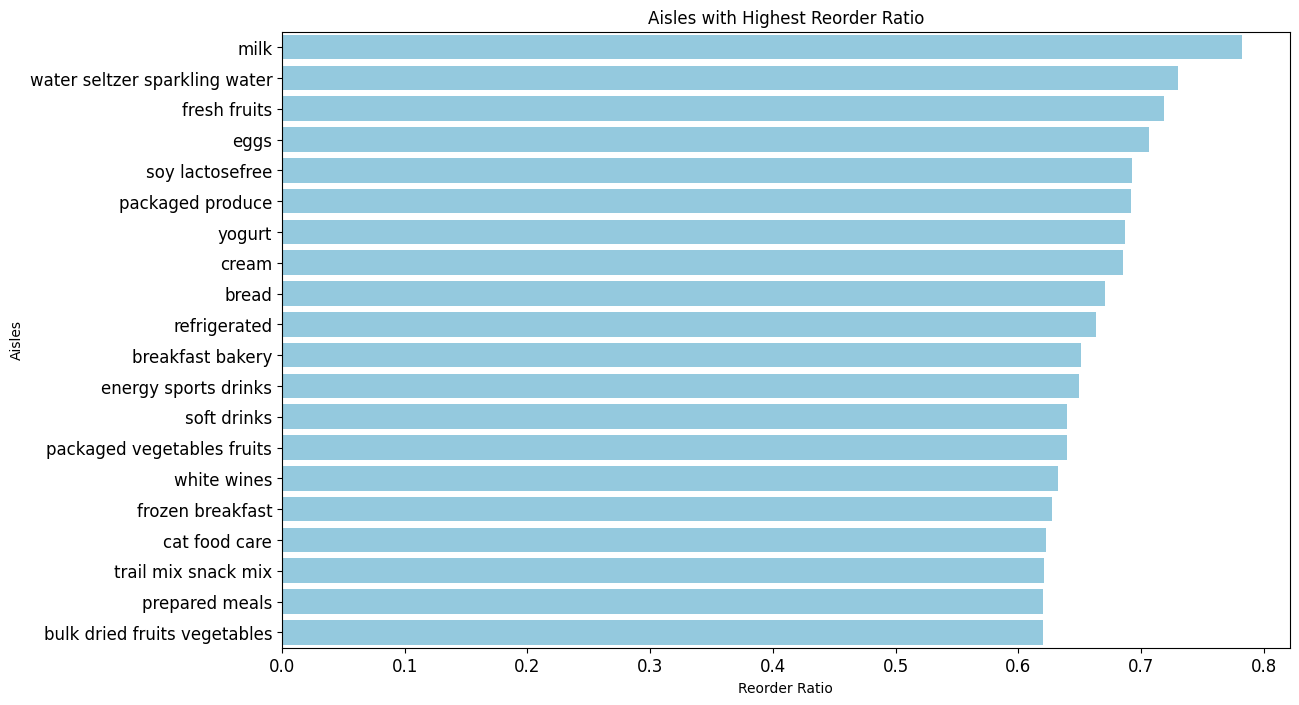

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(
    y=temp_df.aisle[0:20],
    x=temp_df.reorder_ratio[0:20],
    color='skyblue',
    ax=ax
)

ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis='both', labelsize=12)
plt.show()


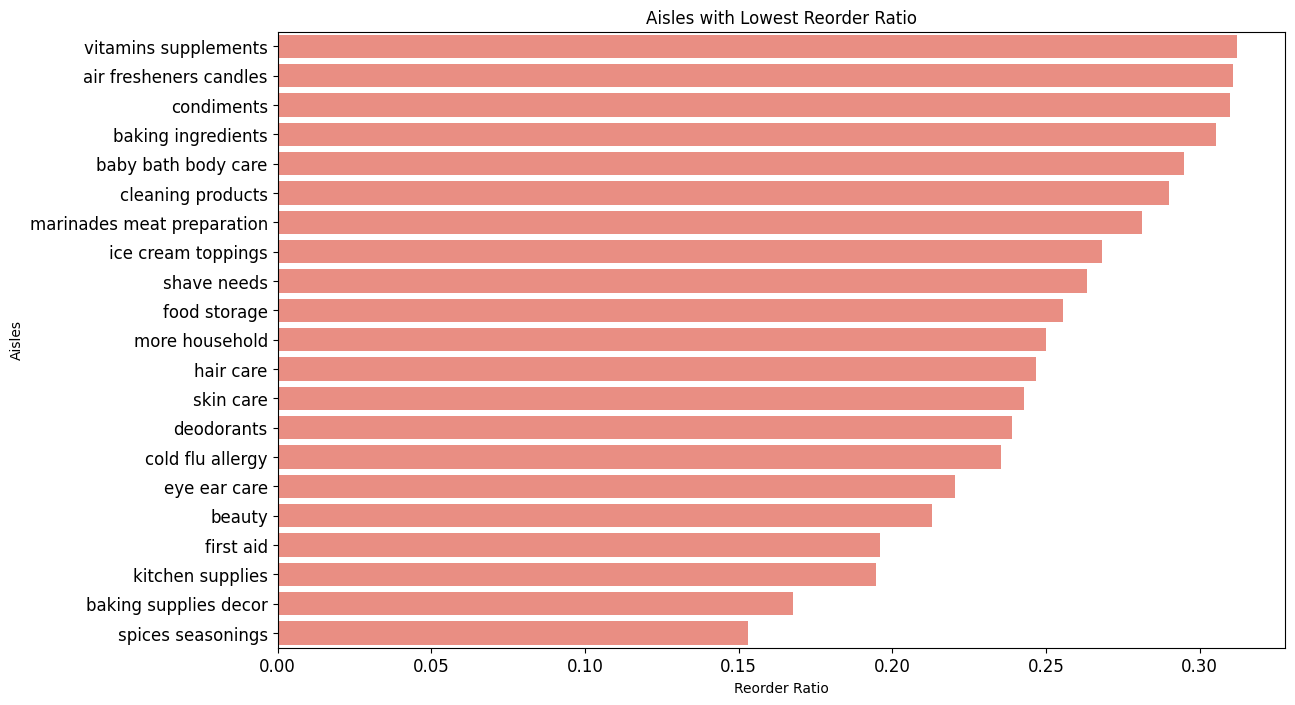

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(
    y=temp_df.aisle[-21:],
    x=temp_df.reorder_ratio[-21:],
    color='salmon',
    ax=ax
)

ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis='both', labelsize=12)
plt.show()


In [ ]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

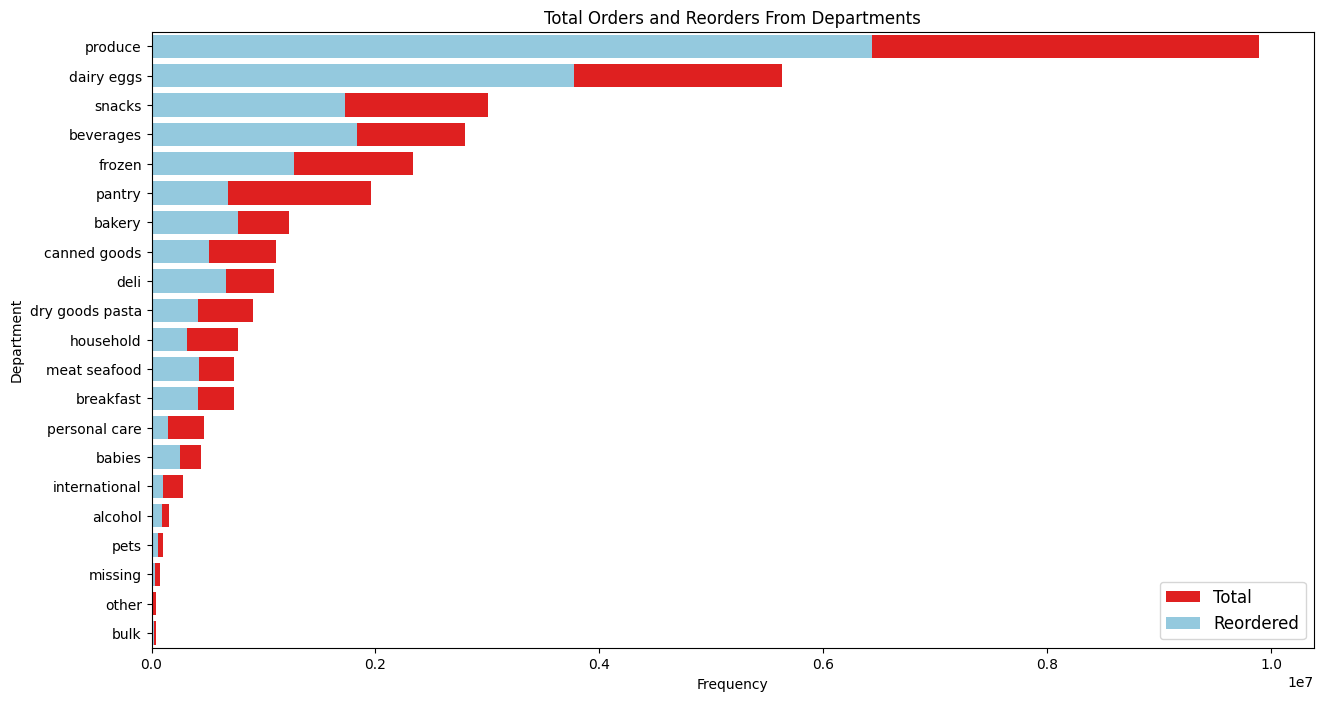

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

# Plot total orders
sns.barplot(
    y=temp_df.department,
    x=temp_df["total"],
    color='red',
    label='Total',
    ax=ax
)

sns.barplot(
    y=temp_df.department,
    x=temp_df["reorders"],
    color='skyblue',
    label='Reordered',
    ax=ax
)

ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc='lower right', prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()


In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

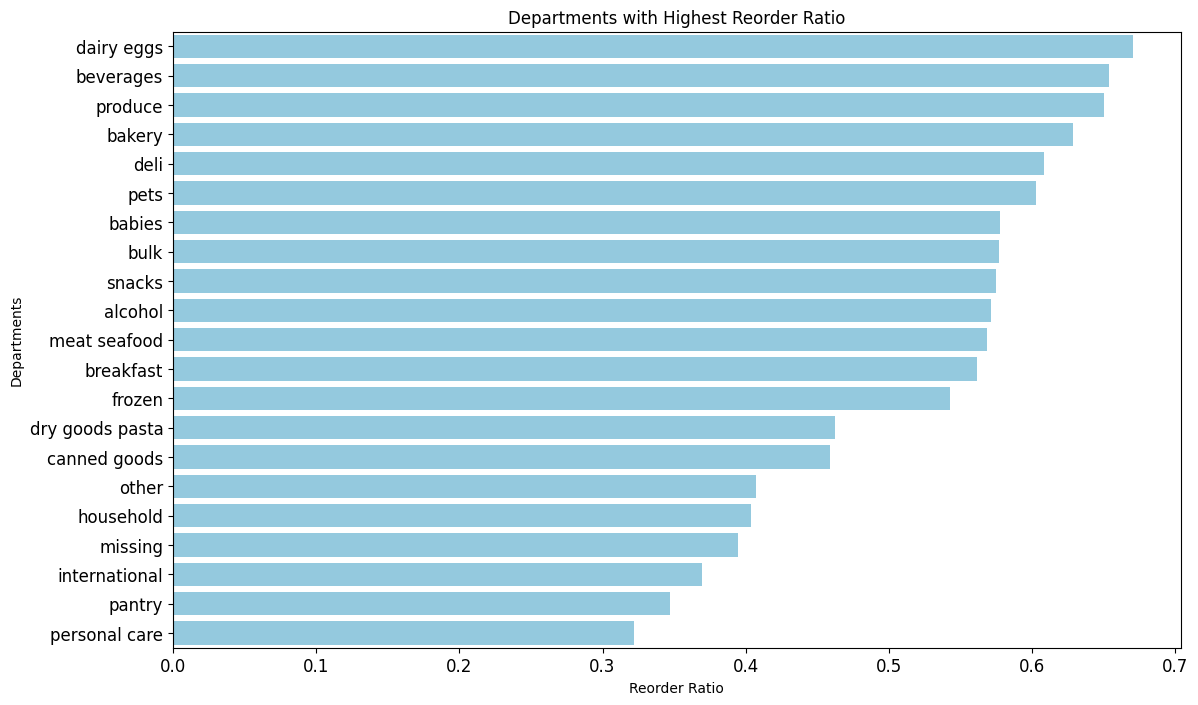

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 8))
sns.barplot(
    y=temp_df.department,
    x=temp_df.reorder_ratio,
    color='skyblue',
    ax=ax
)

ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis='both', labelsize=12)
plt.show()


In [ ]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

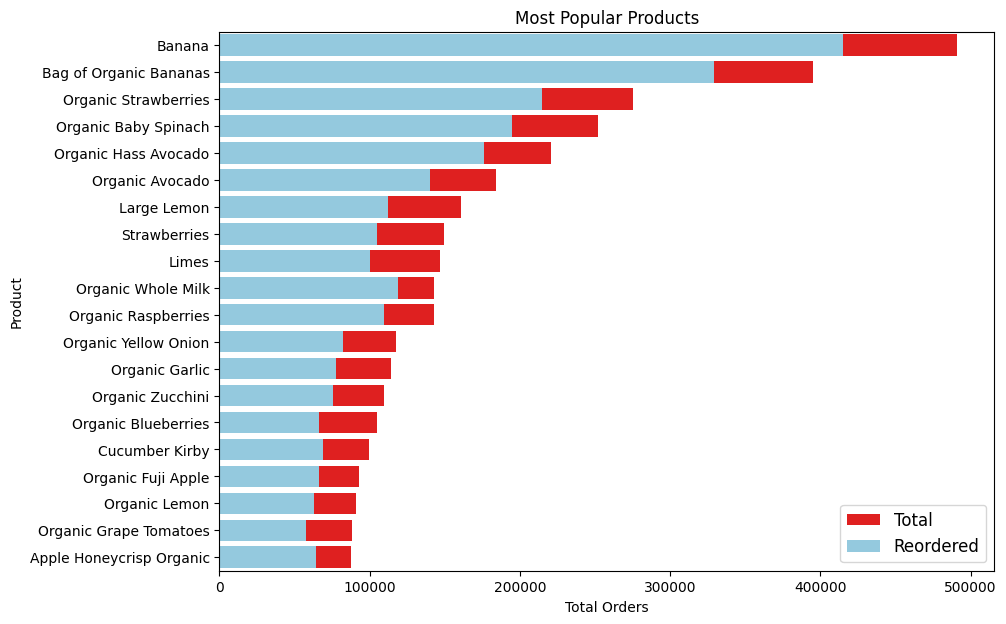

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 7))

sns.barplot(
    y=temp_df.product_name[0:20],
    x=temp_df.total[0:20],
    color='red',
    label='Total',
    ax=ax
)

sns.barplot(
    y=temp_df.product_name[0:20],
    x=temp_df.reorders[0:20],
    color='skyblue',
    label='Reordered',
    ax=ax
)

ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc='lower right', prop={'size': 12})
plt.show()


In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23857,Raw Veggie Wrappers,69,65,0.942029
21417,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40462,Orange Energy Shots,13,12,0.923077
20306,Chocolate Love Bar,102,94,0.921569
30581,Soy Powder Infant Formula,35,32,0.914286
28044,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
35259,"Energy Shot, Grape Flavor",22,20,0.909091
32077,Russian River Valley Reserve Pinot Noir,30,27,0.900000
23926,Bars Peanut Butter,69,62,0.898551
24225,Soy Crisps Lightly Salted,67,60,0.895522


In [ ]:
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [ ]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
3832,Bars Peanut Butter,7,69,62,0.898551
41712,Soy Crisps Lightly Salted,7,67,60,0.895522


In [ ]:
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,76125,491291,415166,0.845051,76125
1,Bag of Organic Bananas,65655,394930,329275,0.833755,141780
2,Organic Strawberries,61129,275577,214448,0.778178,202909
3,Organic Baby Spinach,56766,251705,194939,0.774474,259675
4,Large Lemon,48614,160792,112178,0.697659,308289


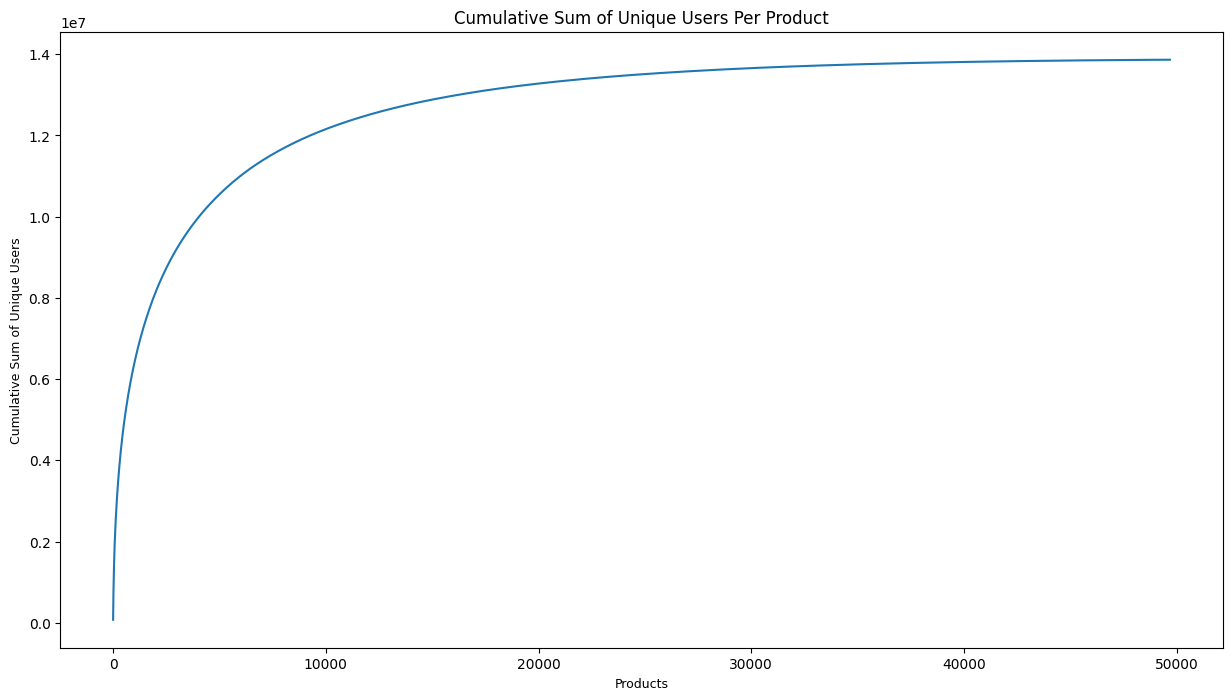

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=temp_df.index, y=temp_df.cum_users, ax=ax)
ax.set_xlabel("Products", size=9)
ax.set_ylabel("Cumulative Sum of Unique Users", size=9)
ax.set_title("Cumulative Sum of Unique Users Per Product", size=12)
plt.show()


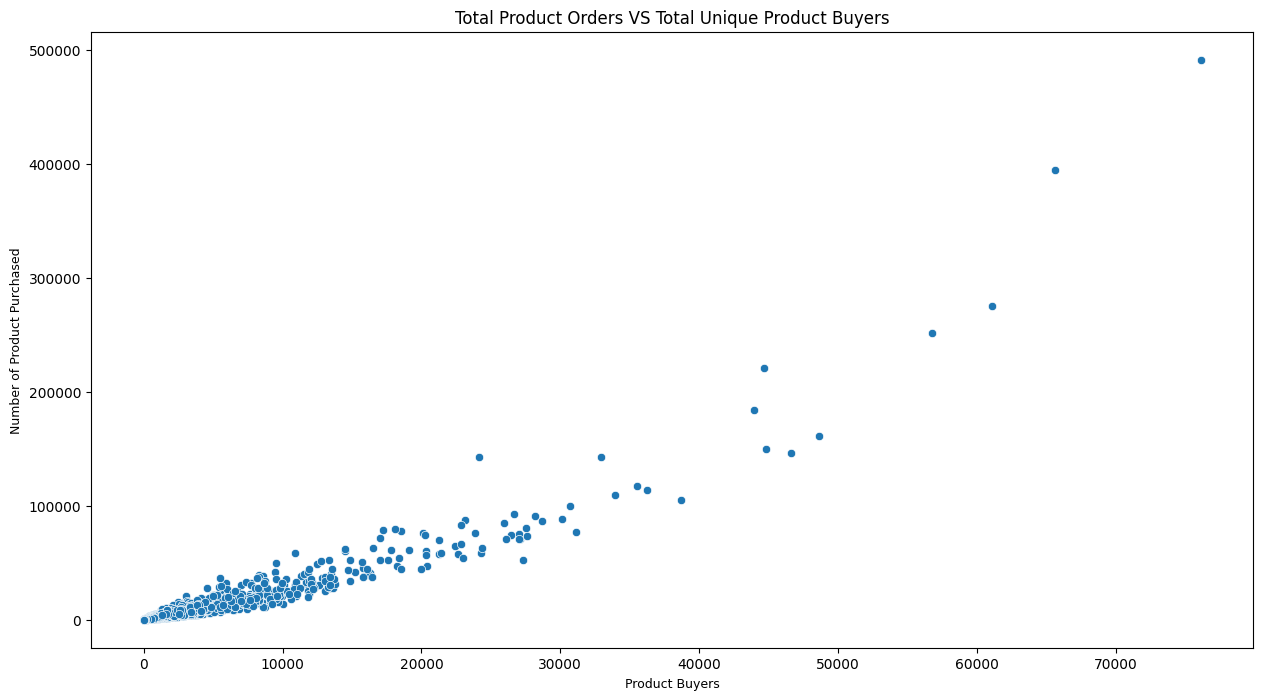

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(
    y=product_unique_users.total,
    x=product_unique_users.total_users,
    ax=ax
)

ax.set_xlabel("Product Buyers", size=9)
ax.set_ylabel("Number of Product Purchased", size=9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size=12)
plt.show()


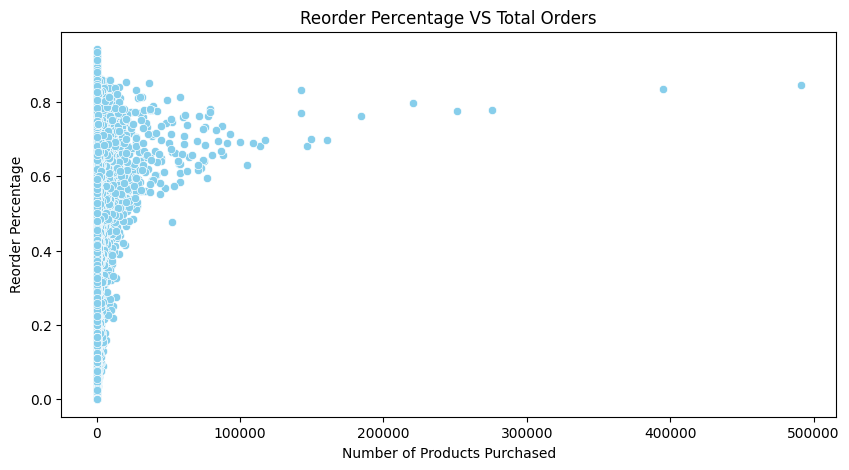

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    x=product_unique_users.total,
    y=product_unique_users.reorder_ratio,
    color='skyblue',
    ax=ax
)

ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()


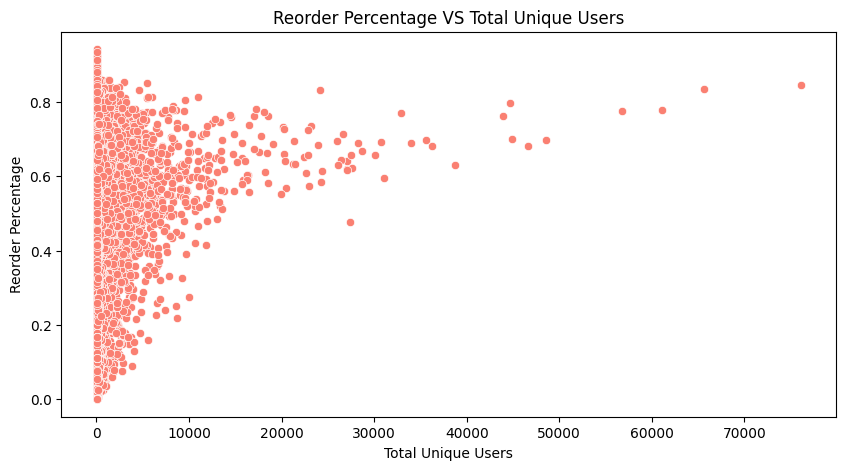

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    x=product_unique_users.total_users,
    y=product_unique_users.reorder_ratio,
    color='salmon',
    ax=ax
)

ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()


In [ ]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3,0.214286,False
2,#2 Mechanical Pencils,9,9,0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483,False


/tmp/ipython-input-46-2386255631.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


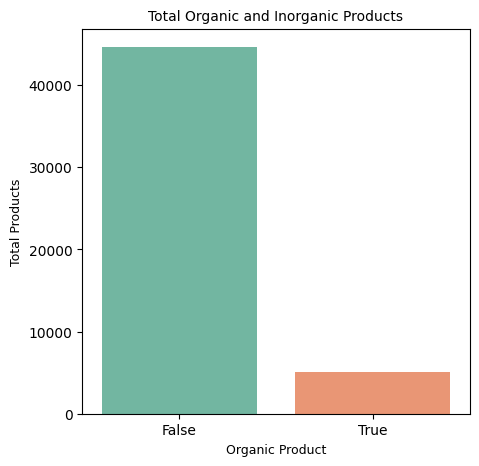

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

organic_counts = product_unique_users.groupby('Organic').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    x='Organic',
    y='count',
    data=organic_counts,
    palette='Set2',
    ax=ax
)

ax.set_xlabel("Organic Product", size=9)
ax.set_ylabel("Total Products", size=9)
ax.set_title("Total Organic and Inorganic Products", size=10)
plt.show()


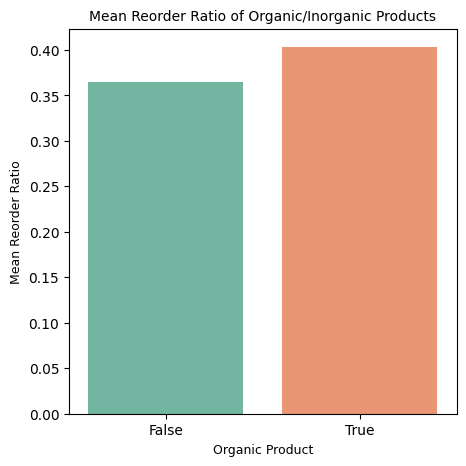

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_reorder = product_unique_users.groupby('Organic')['reorder_ratio'].mean().reset_index()

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    x='Organic',
    y='reorder_ratio',
    hue='Organic',
    data=mean_reorder,
    palette='Set2',
    legend=False,
    ax=ax
)

ax.set_xlabel("Organic Product", size=9)
ax.set_ylabel("Mean Reorder Ratio", size=9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size=10)
plt.show()


In [ ]:
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


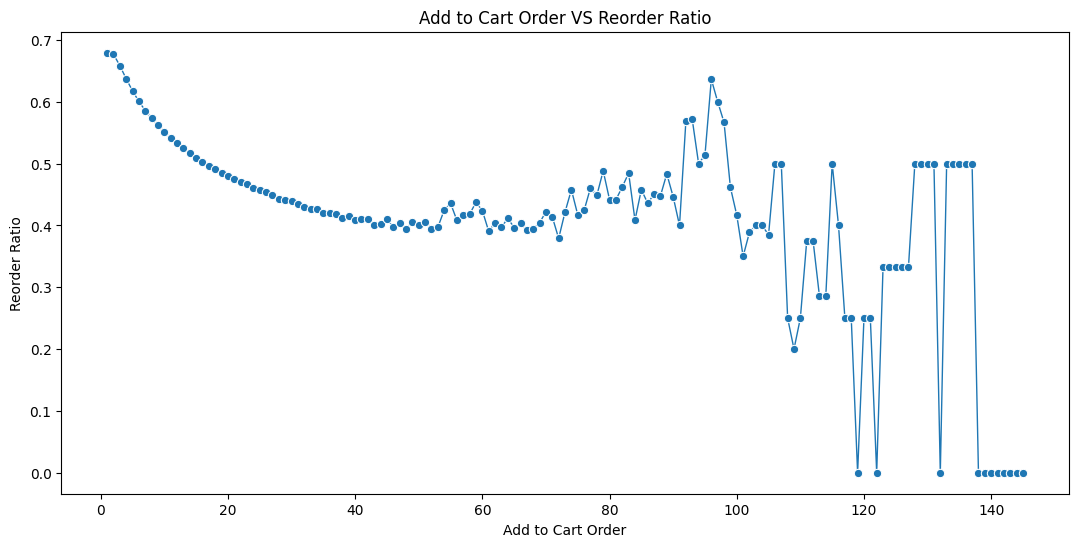

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(13, 6))
sns.lineplot(
    x=temp_df.add_to_cart_order,
    y=temp_df.reordered,
    lw=1,
    marker='o',
    ax=ax
)

ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()


In [ ]:
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

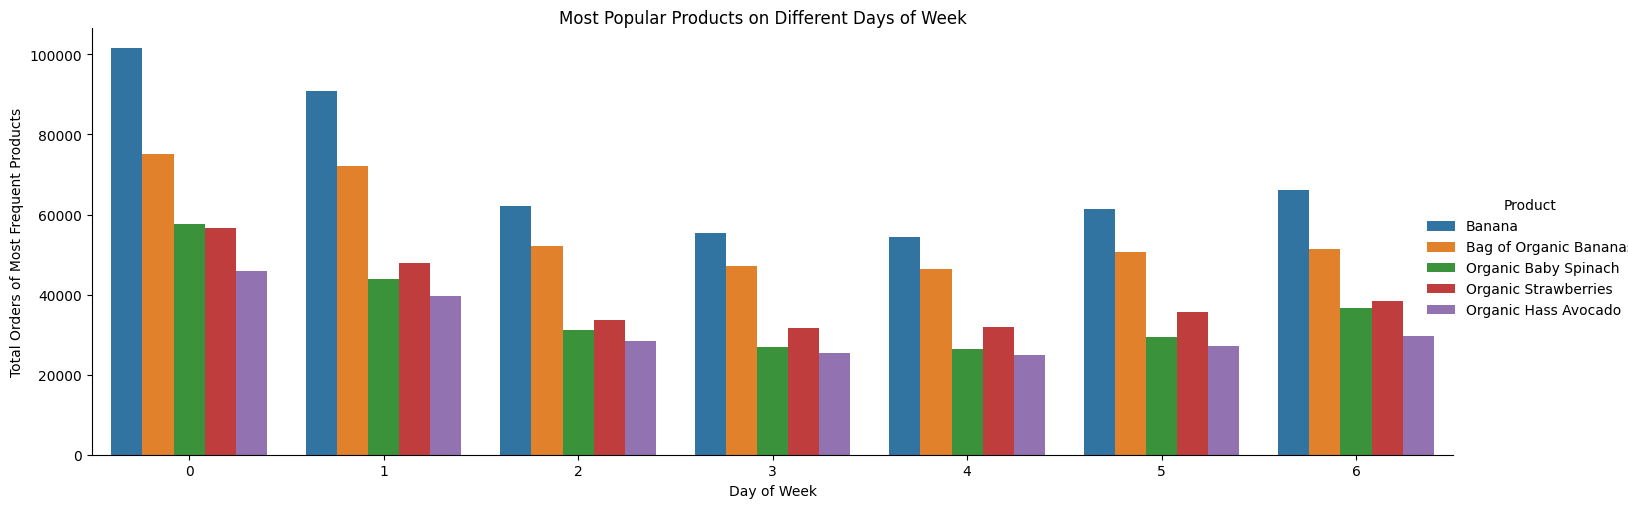

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
ax = sns.catplot(
    x="order_dow",
    y="counts",
    hue="product_name",
    data=temp_df,
    kind="bar",
    height=5,
    aspect=2.7,
    legend=True
)

# Move the legend to the right side
ax._legend.set_title("Product")
ax._legend.set_bbox_to_anchor((1.05, 0.5))

# Add labels and title
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on Different Days of Week", va="baseline", ha="center")

# Adjust space to accommodate the legend
plt.subplots_adjust(right=0.94)
plt.show()


